# Dataset Description

    URL: https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction/data

The bank customer churn dataset is a CSV file which contains information about a study related to customer churn in a banking institution. The information is divided into 18 different variables, organized in 18 columns, being the first one the number of rows.

The attributes analyzed by this study is splitted into the different columns, which are:

    QUANTITATIVE VARIABLES: 
Customer identification: a unique id for each customer. 

Age: Customer’s age. 

Credit Score: A value between 300 and 850 which expresses the level of probability of a customer to pay off the debt to the bank.

Tenure: Number of years a customer has been a client of the bank. 

Account Balance: Customer account balance. 

Estimated yearly salary: An estimation of the customers salary.


    QUALITATIVE VARIABLES: 
Surname: Surname of the customer. 

Geography: Country where the customer lives. 

    BOOLEAN VARIABLES (1 for Yes, 0 for No): 
HasCrCard: If customer has or not a Credit Card. 

IsActiveMember: If the customer is an active member or not. 

Exited: If the customer has exited the bank. Gender: If the customer is male or female.

    PROBLEM DESCRIPTION:
The primary task that we are going to be intending to solve is to apply what we are going to be learning during the course such as: machine learning techniques, training processes,etc. In order to build and train a model capable of learning and predicting when a customer is more likely to exit the banking platform.

# Libraries and Dataset importation

In [1]:
# Load libraries
import pandas as pd
import numpy as np 
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [2]:
data = pd.read_csv(r'src\rawDataset.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# Data Cleaning - Exploratory Data Analysis (EDA)

    Dimensions of the dataset

In [3]:
data.shape

(10000, 18)

    Column data types

In [4]:
print(data.dtypes)

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object


    Missing values

In [5]:
print(data.isnull().sum())

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


    Duplicated rows + Drop non-relevant features

In [6]:
duplicates = data.duplicated().sum()
if duplicates > 0:
    print(f"There are {duplicates} duplicated rows in the dataset.")
else:
    print("No duplicated rows found in the dataset.")

data.drop(columns=['RowNumber','Surname','CustomerId'], inplace= True)

No duplicated rows found in the dataset.


- Result:
    
As shown, our dataset seems to be be complete and reliable. There are no missing values, ensuring every column is fully populated, and there are no duplicate records, which maintains the accuracy of our analysis. 

Additionally, all columns have consistent data types, further supporting the integrity of the dataset. This robust data quality provides a solid foundation for our machine learning project.


    Categorical and Numerical columns analysis

In [7]:
numericData = data.select_dtypes(include=[np.number])
numericData.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425


In [8]:
categoricData = data.select_dtypes(exclude=[np.number]) 
for i in categoricData.columns:                        
    uniqueCats = categoricData[i].unique()
    print(f"{i}: {list(uniqueCats)}")

Geography: ['France', 'Spain', 'Germany']
Gender: ['Female', 'Male']
Card Type: ['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM']


    Numerical values outlier detection

In [9]:
numeric_columns = ["CreditScore", "Tenure", "Balance", "EstimatedSalary", "Point Earned"]

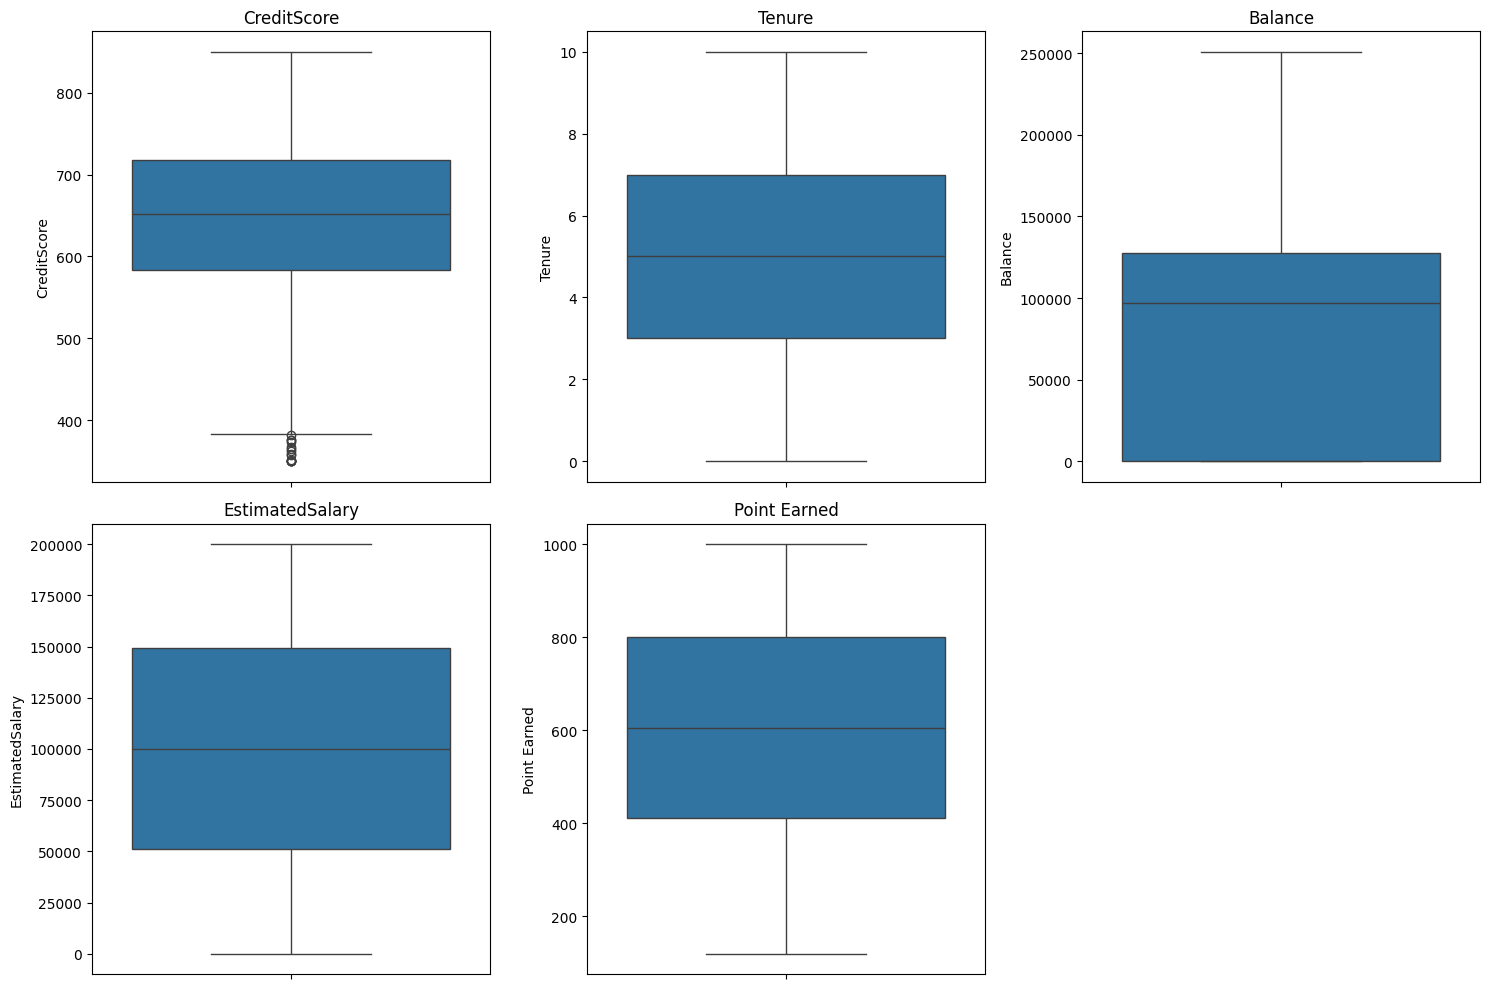

In [10]:

plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

- Result:

Credit Score: Some outliers under 400 (points)
    
Age: Some over 60 (years old)
    
Others: We can't observe any outlier value

    Numerical values outlier treatment

    -Option 1: Age grouping by range

In [11]:
bins = [0, 30, 40, 50, 60, 100]  
labels = ['<30', '30-40', '40-50', '50-60', '>60']

data['Age'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)


print(data['Age'].value_counts())

Age
30-40    4346
40-50    2618
<30      1641
50-60     869
>60       526
Name: count, dtype: int64


    Categorical values outlier detection

In [12]:
categorical_columns = ['Age', 'Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Complain', 'Satisfaction Score', 'Card Type']

    -One hot encoder

In [13]:
encoder = OneHotEncoder(sparse_output=False, drop='first', dtype=int)

catcols = ['Gender','Geography', 'Card Type']
encData = encoder.fit_transform(data[catcols])
encDF = pd.DataFrame(encData, columns=encoder.get_feature_names_out(catcols))
data2 = pd.concat([data.drop(columns= catcols),encDF],axis=1)

data2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Gender_Male,Geography_Germany,Geography_Spain,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,40-50,2,0.00,1,1,1,101348.88,1,1,2,464,0,0,0,0,0,0
1,608,40-50,1,83807.86,1,0,1,112542.58,0,1,3,456,0,0,1,0,0,0
2,502,40-50,8,159660.80,3,1,0,113931.57,1,1,3,377,0,0,0,0,0,0
3,699,30-40,1,0.00,2,0,0,93826.63,0,0,5,350,0,0,0,1,0,0
4,850,40-50,2,125510.82,1,1,1,79084.10,0,0,5,425,0,0,1,1,0,0


This would be used when fitting the model, not currently for the analysis

    Outlier Treatement

- Available Outlier Management Methods:


delete outliers

transform outliers

maintain outliers

    -Option 1: Data deletion

In [14]:
def delete_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    low_bound = q1 - 1.5 + iqr
    high_bound = q3 - 1.5 + iqr
    return data[(data[column] >= low_bound) & (data[column] <= high_bound)]

In [ ]:
dataDel = delete_outliers(data, "CreditScore")

In [ ]:
print(dataDel.shape)
print(data.shape)

(2535, 15)
(10000, 15)


- Result:

We started with 10000 rows, so staing with 2535 after outlier management could no be the best solution

    -Option 2: Outlier transformation

In [17]:
def winsorize_outliers(data, column, multiplier):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    low_bound = q1 - multiplier * iqr
    high_bound = q3 + multiplier * iqr

    data[column] = np.where(data[column] < low_bound, low_bound, data[column])
    data[column] = np.where(data[column] > high_bound, high_bound, data[column])

In [18]:
dataPre = data

winsorize_outliers(data, "CreditScore", 1.5)

print(dataPre.shape)
print(data.shape)

(10000, 15)
(10000, 15)


- Result:

Now, this will limit posible values to the ones limited by the "iqr" variable, instead of loosing 80% of our data by eliminating them all

    Numerical values visualization

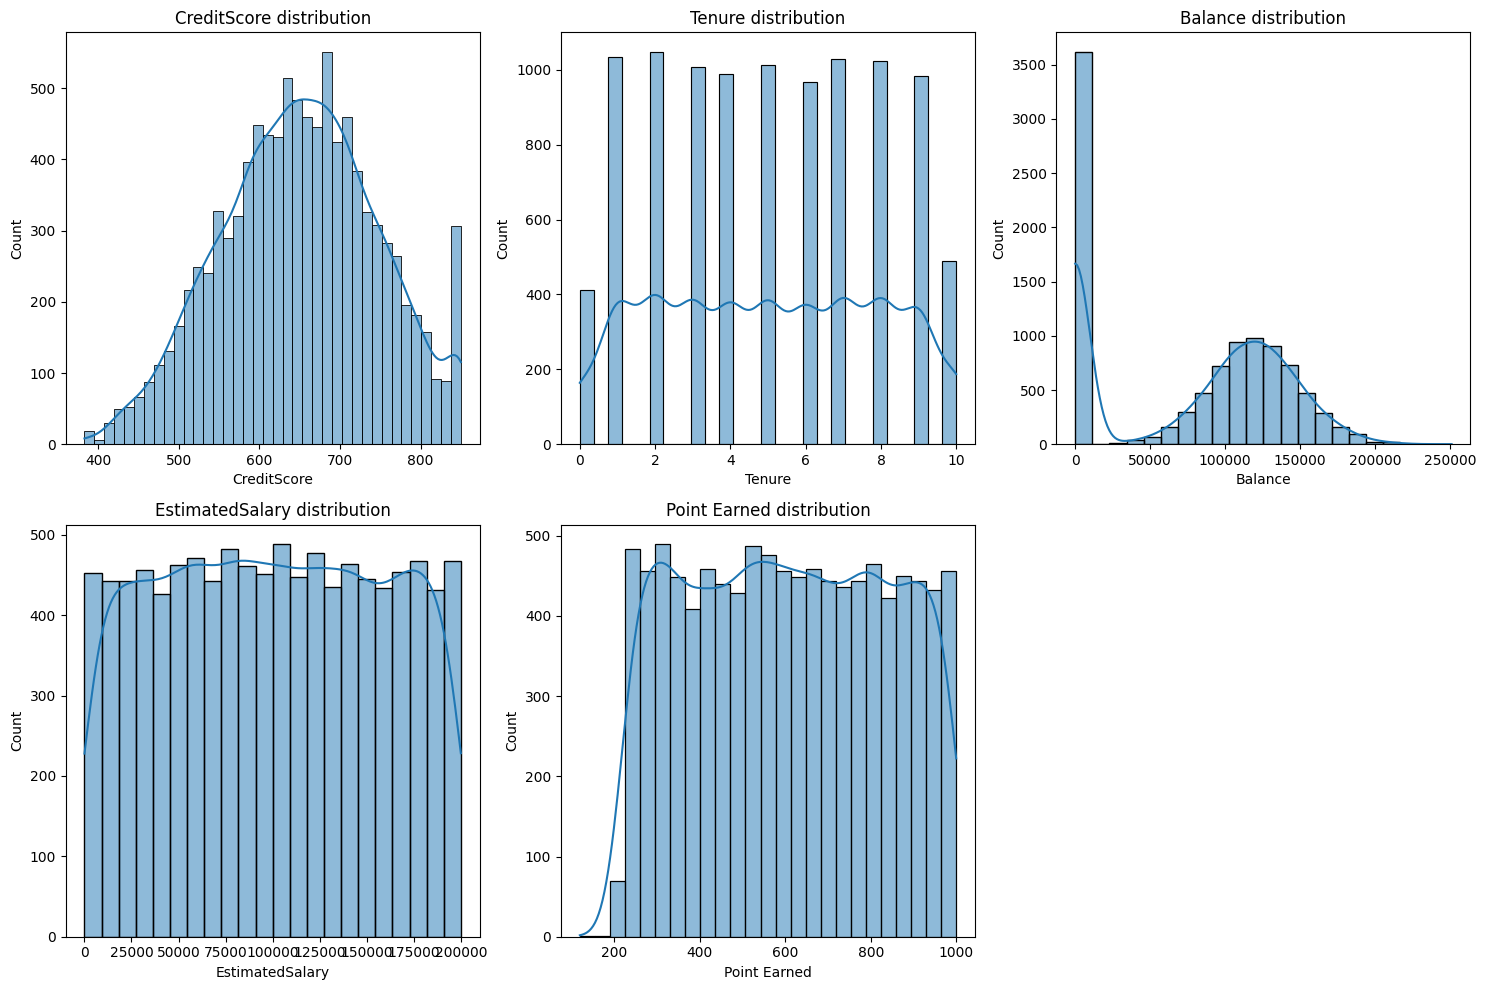

In [19]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'{column} distribution')

plt.tight_layout()
plt.show()

- Result:

Taking a look at the graphics we can see that Estimated Salary and Points Earned are pretty regular (except from the 200 points value with a lower count).
The Credit Score value is mostly concentrated in the middle around 650, in the Age, around 30 and 40 years, with a big count at 60 years caused by the limitation of the IQRat the outlier management, limitating it past 60. Looking at the balance, most users dont have any balance, even if most users seem to have a balance of around 125.000. 

    Categorical values visualization

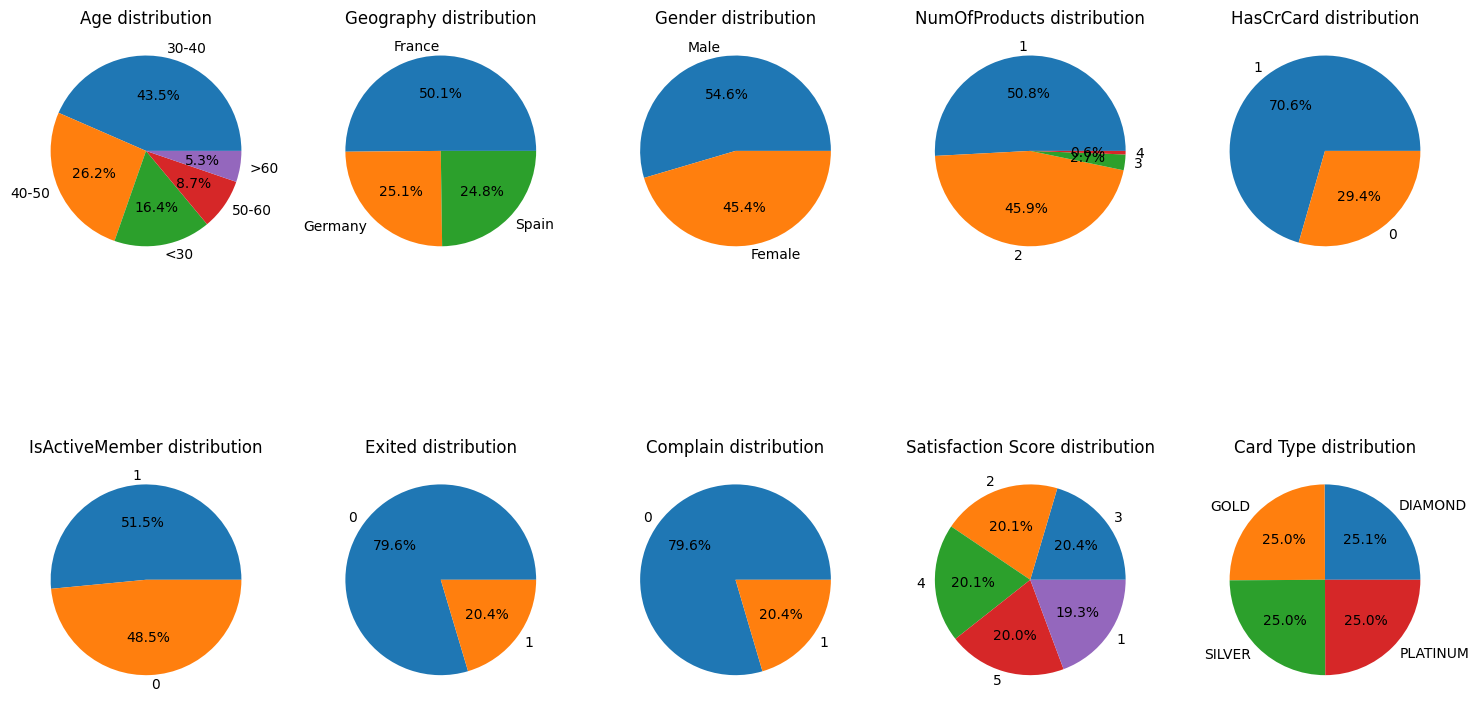

In [20]:
categorical_columns = ["Age", "Geography", "Gender", "NumOfProducts", "HasCrCard", "IsActiveMember", "Exited", "Complain", "Satisfaction Score", "Card Type"]
plt.figure(figsize=(15, 10))  
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 5, i)  
    data[column].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'{column} distribution')
    plt.ylabel('') 
plt.tight_layout()
plt.show()

-  Solution:

Here we can see that isACtiveMember, Satisfaction Score and Card Type distributions are similar, but that is not the same case for the rest, as they are more or less equally distributed, but clearly not equally at least. We can also detect that the distribution of Exit and Complain are the same, this could mean that they have equal values, but we can't confirm it yet.




Also, the Exited pie chart distribution between people who has or not churned, we see that our data has a way higher amount of people who has not churned. This fact must be taken into account when dealling with the data.

    -Churn by geography and gender

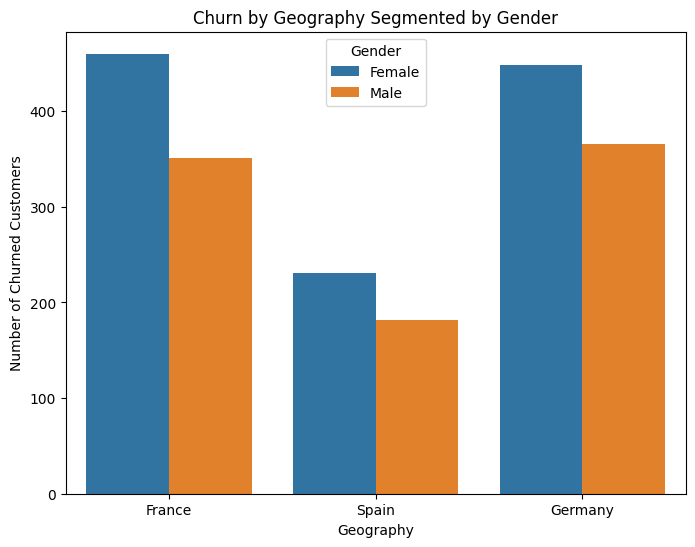

In [21]:
churned_data = data[data['Exited'] == 1]


plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', hue='Gender', data=churned_data)
plt.title('Churn by Geography Segmented by Gender')
plt.xlabel('Geography')
plt.ylabel('Number of Churned Customers')
plt.show()


- Result:

We suggest that the number of churns are proportional to the amount of people in each country group. Then we can see an equal dominance from women to men when refering to the amount of churns in three groups. 

    Data type comprobation

In [22]:
data['Tenure'] = data['Tenure'].astype(int)
data['NumOfProducts'] = data['NumOfProducts'].astype(int)
data['HasCrCard'] = data['HasCrCard'].astype(int)
data['IsActiveMember'] = data['IsActiveMember'].astype(int)
data['Exited'] = data['Exited'].astype(int)
data['Complain'] = data['Complain'].astype(int)
data['Satisfaction Score'] = data['Satisfaction Score'].astype(int)

    Data normalization and standardization

In [23]:
scaler = StandardScaler()
data[['CreditScore', 'Tenure', 'Balance', 'EstimatedSalary', 'Point Earned']] = scaler.fit_transform(
    data[['CreditScore', 'Tenure', 'Balance', 'EstimatedSalary', 'Point Earned']]
)

    New Variable Creation

In [24]:
data['Balance_to_Salary'] = data['Balance'] / (data['EstimatedSalary'] + 1)

The new variable Balance_to_Salary measures the relationship between a customers balance and their estimated salary, which is helpful when measuring the financial capacity.

    Univariant analysis

In [25]:
stats = data.describe()
print(stats)

        CreditScore        Tenure       Balance  NumOfProducts    HasCrCard  \
count  1.000000e+04  1.000000e+04  1.000000e+04   10000.000000  10000.00000   
mean   4.121148e-16 -1.078249e-16 -6.252776e-17       1.530200      0.70550   
std    1.000050e+00  1.000050e+00  1.000050e+00       0.581654      0.45584   
min   -2.771109e+00 -1.733315e+00 -1.225848e+00       1.000000      0.00000   
25%   -6.893695e-01 -6.959818e-01 -1.225848e+00       1.000000      0.00000   
50%    1.490049e-02 -4.425957e-03  3.319639e-01       1.000000      1.00000   
75%    6.984567e-01  6.871299e-01  8.199205e-01       2.000000      1.00000   
max    2.065569e+00  1.724464e+00  2.795323e+00       4.000000      1.00000   

       IsActiveMember  EstimatedSalary        Exited      Complain  \
count    10000.000000     1.000000e+04  10000.000000  10000.000000   
mean         0.515100    -2.877698e-17      0.203800      0.204400   
std          0.499797     1.000050e+00      0.402842      0.403283   
min     

    Bivariant Analysis

    -Correlation matrix

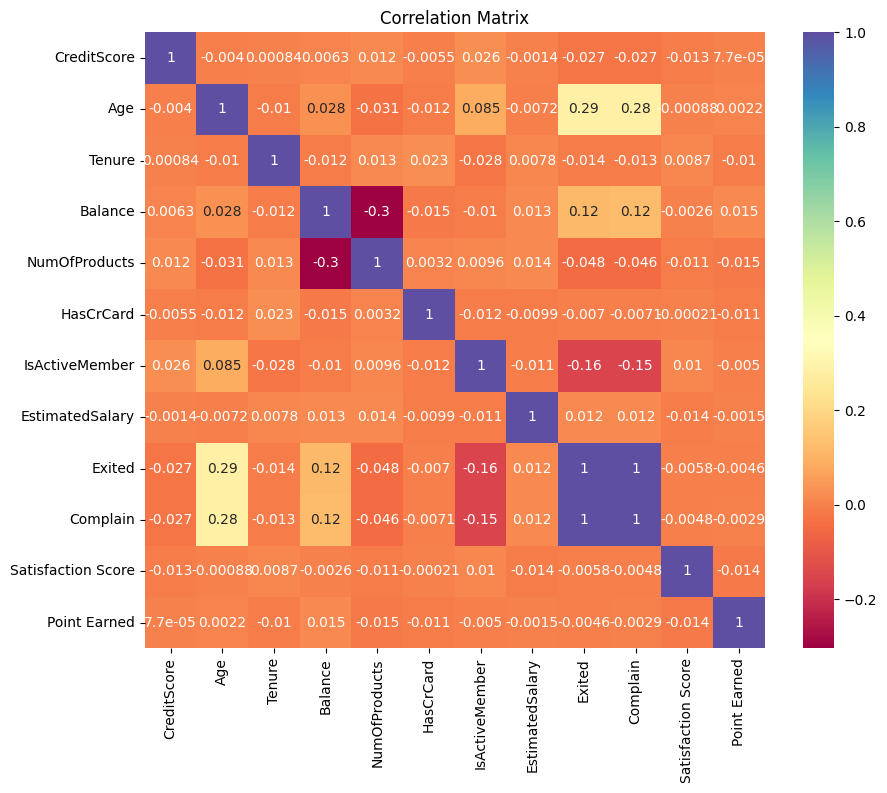

In [26]:
corr_matrix1 = numericData.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix1, annot=True, cmap='Spectral')
plt.title("Correlation Matrix")
plt.show()

- Results: 

- Correlation matrix

The heat map shows that most of the variables dont have a significant correlation value between them, except for these:

Complain / Exit: The +1 correlation value shows that everyone who complained, ended up leaving. This means that both are equal.

Age / Exit: +0.29 tells that there is a correlation, where, the older someone is, the more likely is that person to leave.  

NumOfProducts / Balance : Its the highest -0.3 negative correlation, it means that people with more products tend to have a lower balance.

    -Categorical values with churn visualization

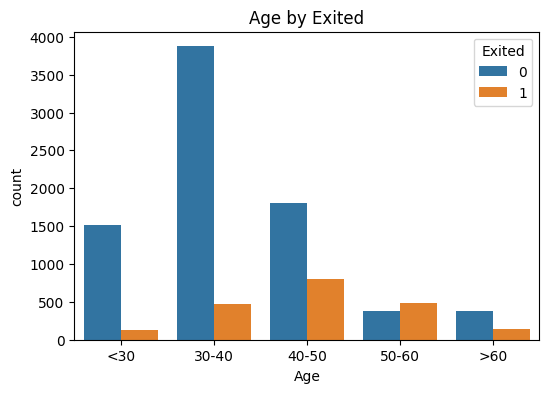

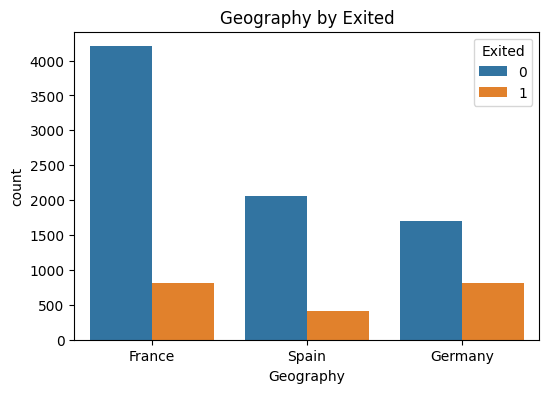

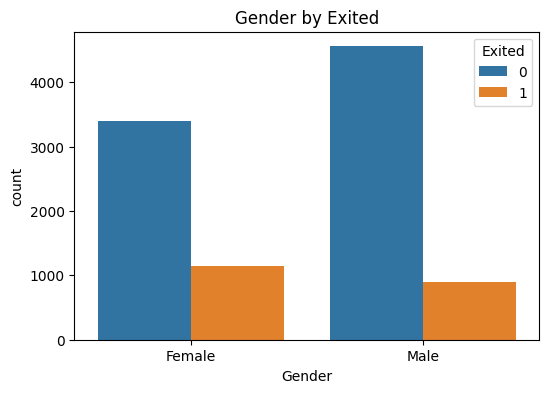

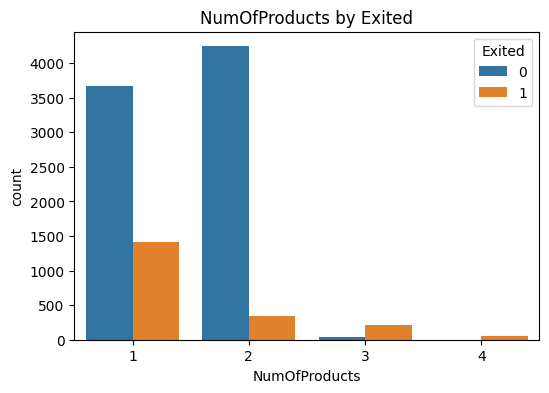

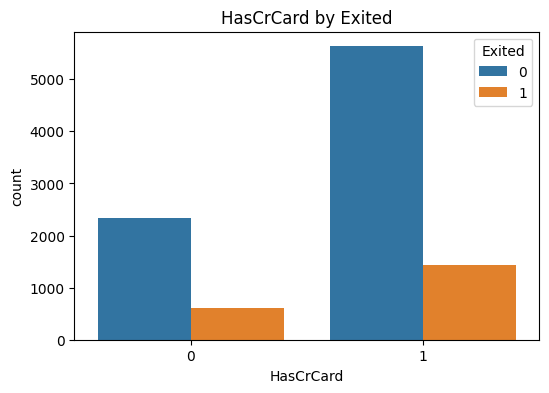

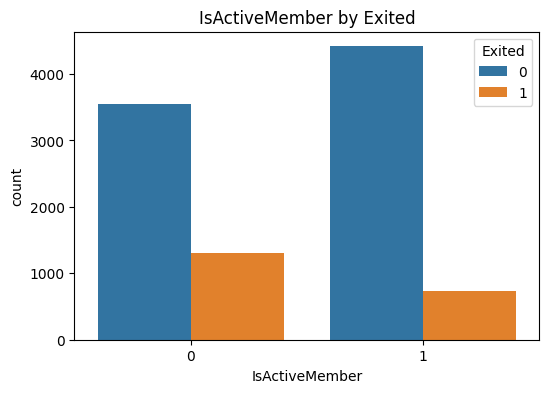

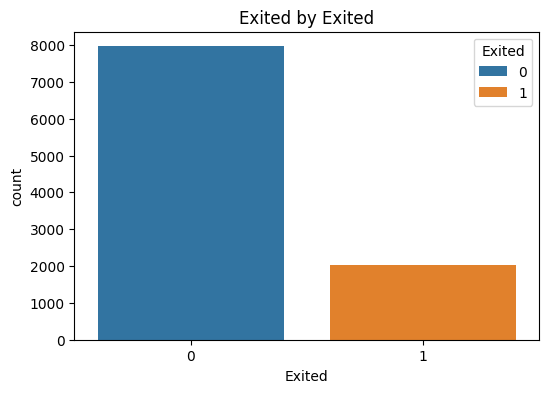

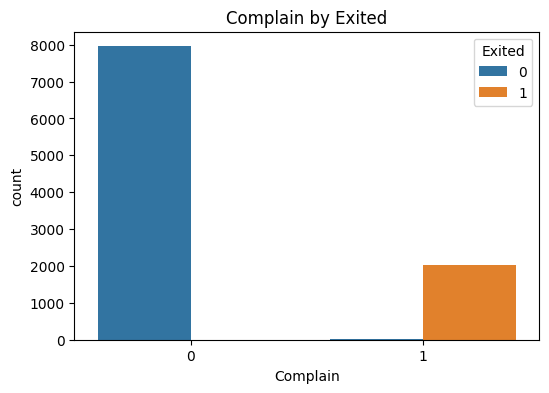

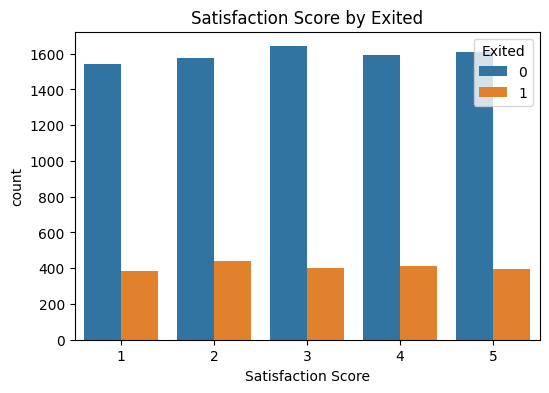

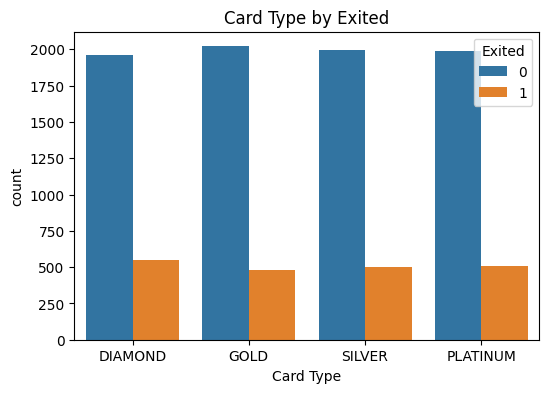

In [27]:
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Exited', data=data)
    plt.title(f'{col} by Exited')
    plt.show()

    Multivariant Analisis

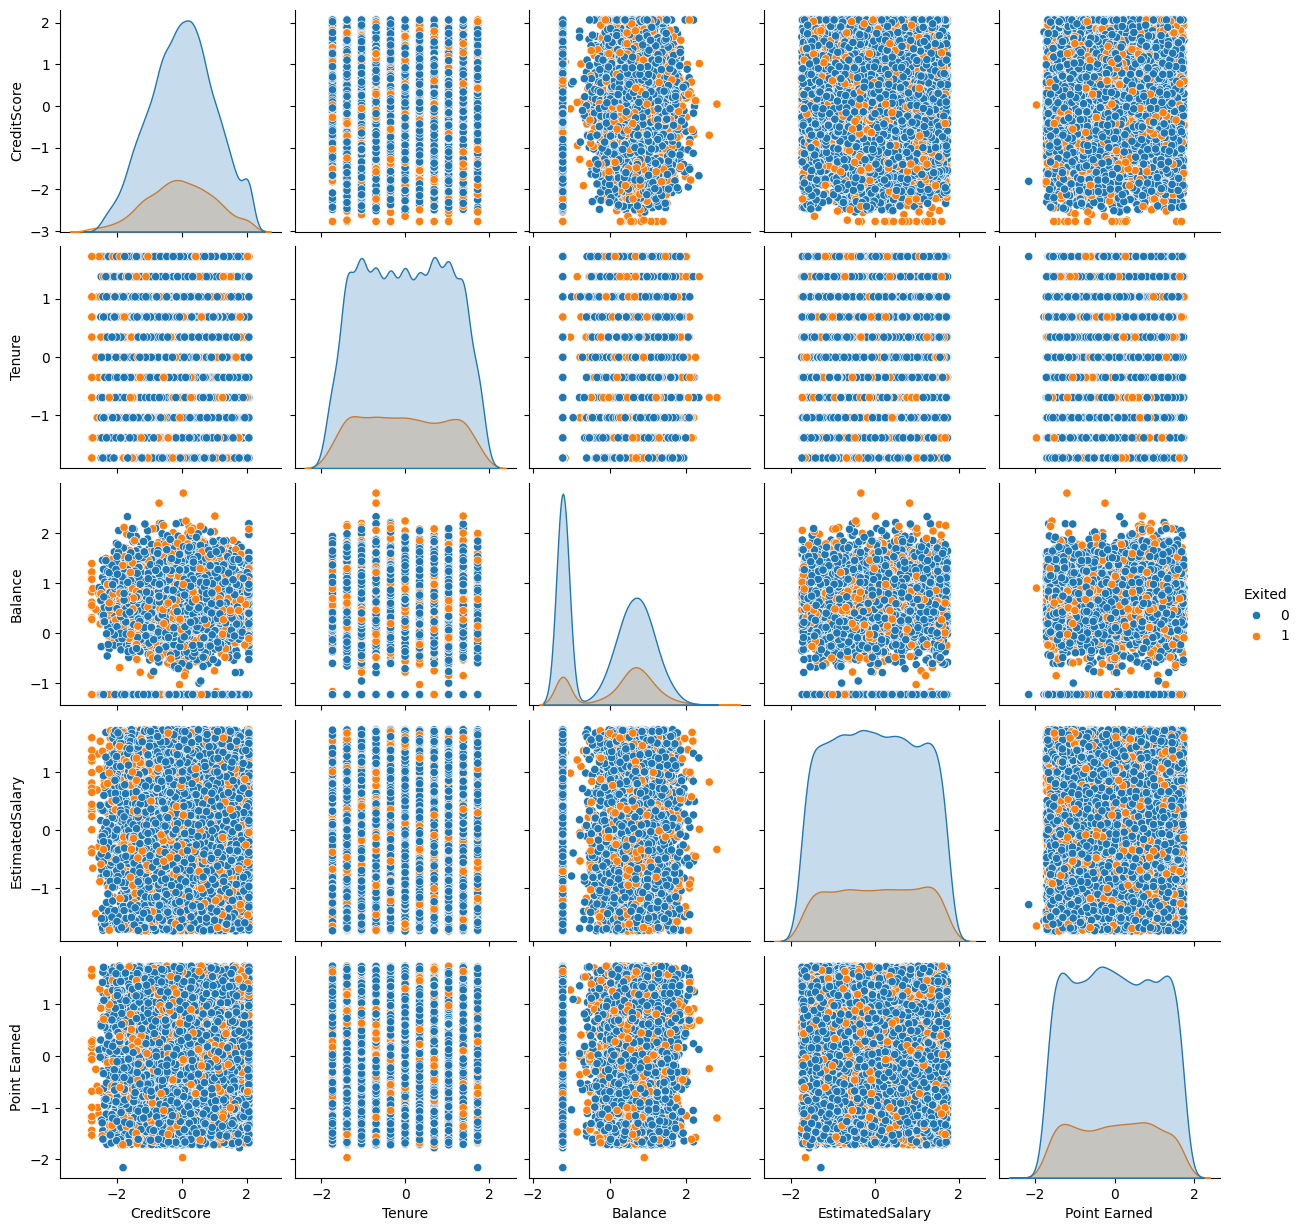

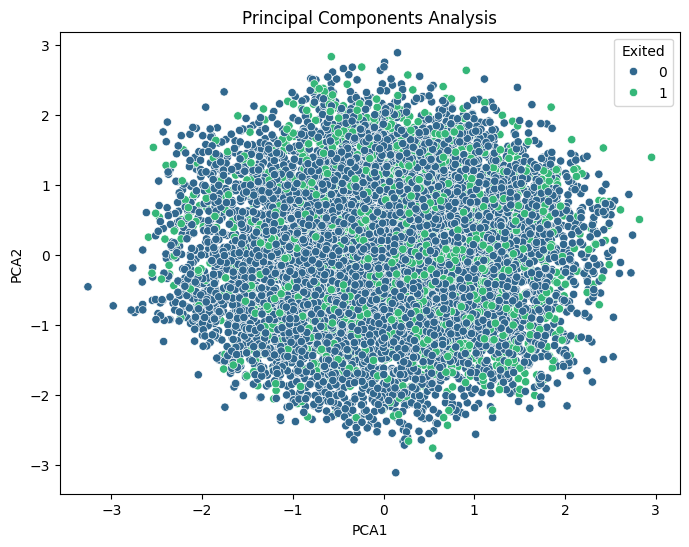

In [28]:
sns.pairplot(data[numeric_columns + ['Exited']], hue='Exited')
plt.show()

pca = PCA(n_components=2)
pca_components = pca.fit_transform(data[numeric_columns])
data['PCA1'] = pca_components[:, 0]
data['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Exited', data=data, palette='viridis')
plt.title('Principal Components Analysis')
plt.show()


- Result:

    OVERALL EDA CONCLUSSIONS:


The dataset contains 10,000 rows, with variables divided in 18 columns.
The data includes quantitative, qualitative, and boolean values related to our problem, churn in banks.

During the EDA process we acomplished to get the following conclussions:

There are no missing or duplicated values in the dataset.

Significant outliers were detected in variables like CreditScore and Age. In order to solve the problem we took 3 different approaches to the problem, transforming, deleting and maintanining the outliers (maintaining them basically means not solving the problem). Finally deciding to limit them in order to ensure the data integrity.

During the analysis of the data, a chart indicated that most customers were not churning.

We created a new variable, Balance_to_Salary, which works as a measure of the financial capacity.

The correlation matrix showed us that most variables had low linear relationships, which would be taken in account for the creation process of the model.

This EDA (Exploratory Data Analysis) process has worked as the preprocessing part of the project, creating a good foundation for the next research and training of a good model and accuratelly predict churnning.

    Feature Selection

    -Correlation Coefficient

In [29]:
bestFeatures = corr_matrix1.index[abs(corr_matrix1['Exited']) >0.1]
dfFiltered = data[bestFeatures]
print(dfFiltered)

        Age   Balance  IsActiveMember  Exited  Complain
0     40-50 -1.225848               1       1         1
1     40-50  0.117350               1       0         1
2     40-50  1.333053               0       1         1
3     30-40 -1.225848               0       0         0
4     40-50  0.785728               1       0         0
...     ...       ...             ...     ...       ...
9995  30-40 -1.225848               0       0         0
9996  30-40 -0.306379               1       0         0
9997  30-40 -1.225848               1       1         1
9998  40-50 -0.022608               0       1         1
9999    <30  0.859965               0       0         0

[10000 rows x 5 columns]


- Result:



    -Chi Square

In [30]:
X = numericData.drop('Exited', axis=1)
y = numericData['Exited']

sets = SelectKBest(chi2, k=8)
X_new = sets.fit_transform(X,y)

selectedCols = X.columns[sets.get_support()]
print(selectedCols)

Index(['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember',
       'EstimatedSalary', 'Complain', 'Point Earned'],
      dtype='object')


- Result:



    -Anova Test

In [31]:
fval, pval = f_classif(X,y)
sets = SelectKBest(score_func=f_classif, k=8)
ressAnova = pd.DataFrame({'Feature': X.columns, 'F-Value': fval, 'P-Value': pval})
print(ressAnova.sort_values(by='P-Value'))
importantFeatures = ressAnova[ressAnova['P-Value'] <0.05]['Feature']
df_filter = data[importantFeatures]

               Feature       F-Value        P-Value
8             Complain  1.153041e+06   0.000000e+00
1                  Age  8.858836e+02  1.346716e-186
6       IsActiveMember  2.505471e+02   9.355110e-56
3              Balance  1.425815e+02   1.209208e-32
4        NumOfProducts  2.271466e+01   1.905777e-06
0          CreditScore  7.170810e+00   7.422037e-03
2               Tenure  1.864783e+00   1.721045e-01
7      EstimatedSalary  1.559862e+00   2.117146e-01
5            HasCrCard  4.865820e-01   4.854722e-01
9   Satisfaction Score  3.420745e-01   5.586474e-01
10        Point Earned  2.141616e-01   6.435350e-01


- Result:



# 1. Data Classification